<a href="https://colab.research.google.com/github/gggggeun/study/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%20%EC%9D%B4%EC%9C%A0(feat.%EA%B8%B0%EC%A4%80%EB%AA%A8%EB%8D%B8%2C%ED%9A%8C%EA%B7%80%EC%84%A0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석을 사용하는 이유(feat. 기준모델, 회귀선)

관찰이나 실험으로 얻은 샘플자료(적은 수의 자료)를 분석하고 설명하기 위해서는 그 자료를 잘 표현할 수 있는 '방정식'을 예측해야한다. 

자료를 가장 잘 설명하는 방정식이란, 원래 자료와의 오차(error)를 가장 적게 만든 식이다. 

아래 그림의 x와 y의 분포도에 있는 저 선(Regression line)이 바로 '자료를 가장 잘 설명하는 방정식'이 된다.

회귀분석에서는 이 선을 '회귀선'이라고 하며, 이 회귀선의 '회귀(방정)식'을 이용하면 독립변수로 종속변수를 예측할 수 있게된다.


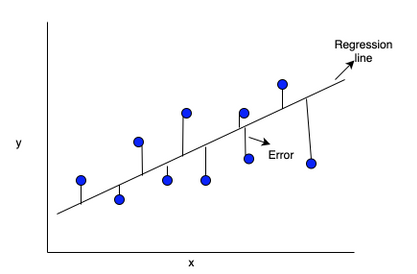

아래 그림은 종속변수(price)와 독립변수(sqft_living)의 분포도와 회귀선을 나타낸 그래프이다. 저 회귀선은 흩어져 있는 잔차들(산포도)을 가장 잘 대표하는 선이다. 여기서 이제 우리는 회귀의 의미를 이해할 수 있다. 

`회귀(Regression)란, 독립변수 X와 종속변수 y의 관계를 함수식으로 설명하는 통계적 방법이다.`

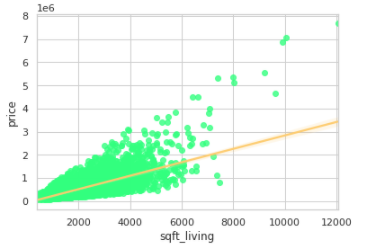

회귀분석에 사용했던 데이터를 가지고 와보겠습니다. 

[Kaggle ](https://www.kaggle.com/harlfoxem/housesalesprediction) 

Dataset : House Sales in King County, USA 

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

In [80]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 기준모델

예측 모델을 구체적으로 만들기 전에 가장 간단하면서도 직관적이면서 최소한의 성능을 나타내는 기준이 되는 모델을 기준모델 이라고 합니다.

회귀분석에서는 기준모델로 보통 종속변수의 평균(mean)과 중앙값(median)을 사용합니다.


평균값을 기준으로 사용하면 평균기준모델, 중앙값을 기준으로 사용하면 중앙값기준모델이 되겠습니다.

참고로 문제별로 기준모델은 보통 다음과 같이 설정합니다.
- 분류문제: 타겟의 최빈 클래스
- 회귀문제: 타겟의 평균값, 중앙값
- 시계열회귀문제: 이전 타임스탬프의 값

In [81]:
# price의 최소, 최대, 평균, 중앙값 계산
print('Min of price : ' ,df['price'].min())
print('Max of price : ' ,df['price'].max())
print('Mean of prcie : ', df['price'].mean())
print('Median of price : ' ,df['price'].median())

Min of price :  75000.0
Max of price :  7700000.0
Mean of prcie :  540088.1417665294
Median of price :  450000.0


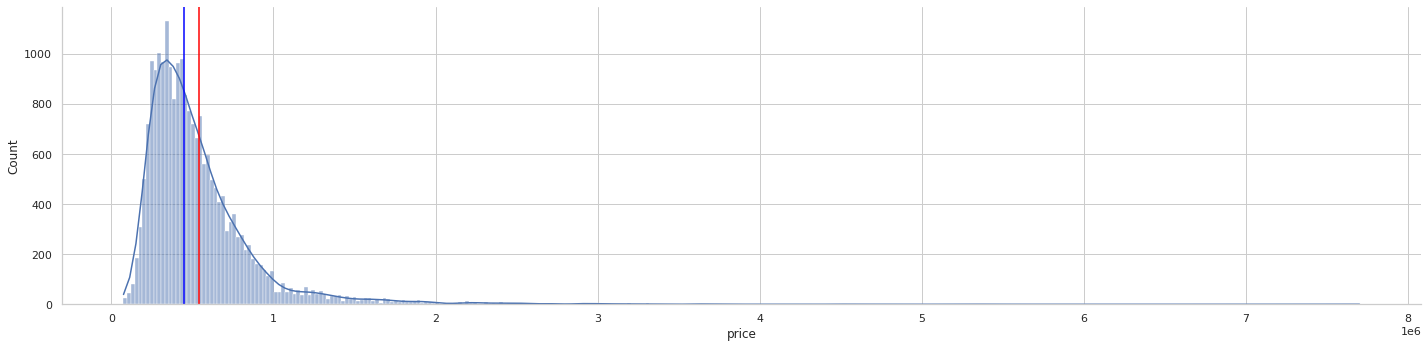

In [82]:
# 평균(빨간색),중앙값(파란색)
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df['price'], kde=True,height=5, aspect=4)
sns.set(style='whitegrid', context='notebook')
plt.axvline(df['price'].mean(), color='red')
plt.axvline(df['price'].median(), color='blue')

In [83]:
## predict: 평균기준모델로 사용해보겠습니다.
predict = df['price'].mean()

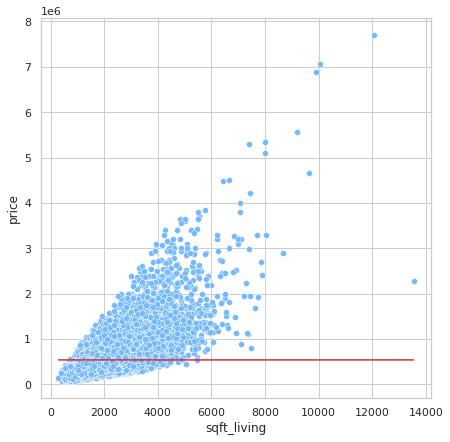

In [84]:
## 독립변수(sqft_living)와 종속변수(price)의 분포도
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['sqft_living'],y=df['price'], color='#74b9ff')
sns.lineplot(x=df['sqft_living'],y=predict, color='#d63031')

위 분포도 그래프를 보면 독립변수와 종속변수가 선형 관계를 그리는 것을 볼 수 있습니다. 그리고 몇개의 특이값(outliers)도 확인할 수 있습니다.

## 선형 회귀선(Linear Reression Line)

그럼 회귀직선은 어떻게 만들 수 있을까? 

회귀분석에서 중요한 개념은 예측값과 잔차(residual) 입니다.
예측값은 만들어진 모델이 추정하는 값이고, 잔차는 예측값과 관측값 차이 입니다.(오차(error)는 모집단에서의 예측값과 관측값 차이를 말합니다.)

회귀선은 잔차 제곱들의 합인 RSS(residual sum of squares)를 최소화 하는 직선입니다. RSS는 SSE(Sum of Square Error)라고도 말하며 이 값이 회귀모델의 비용함수(Cost function)가 됩니다. 머신러닝에서는 이렇게 비용함수를 최소화 하는 모델을 찾는 과정을 학습이라고 합니다.

여기서 계수 $\alpha$ 와 $\beta$ 는 RSS를 최소화 하는 값으로 모델 학습을 통해서 얻어지는 값입니다.

잔차제곱합을 최소화하는 방법을 최소제곱회귀 혹은 Ordinary least squares(OLS)라고 부릅니다.

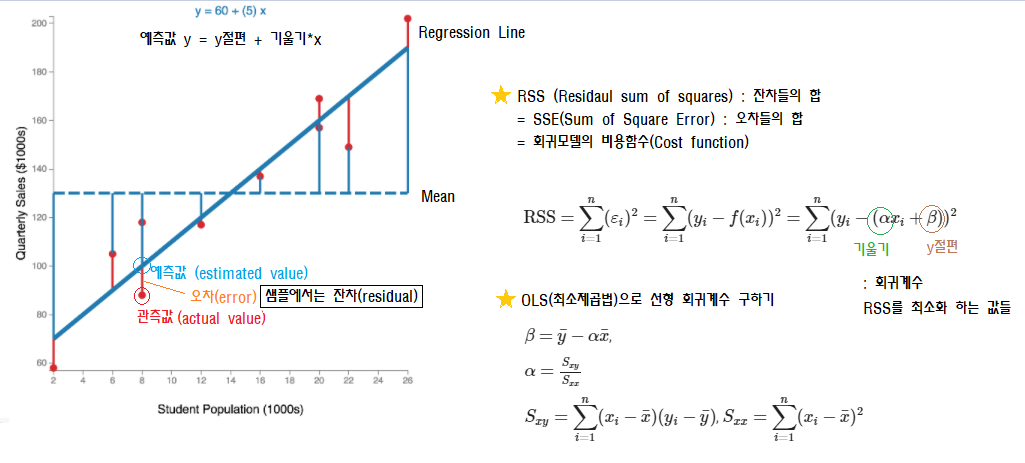

-참고

SSE(Sum of Squares `Error`, 관측치와 예측치 차이): $\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}$

SSR(Sum of Squares due to `Regression`, 예측치와 평균 차이): $\sum_{i=1}^{n}(\hat{y_{i}} - \bar{y_{i}})^{2}$

SST(Sum of Squares `Total`, 관측치와 평균 차이): $\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}$ , SSE + SSR


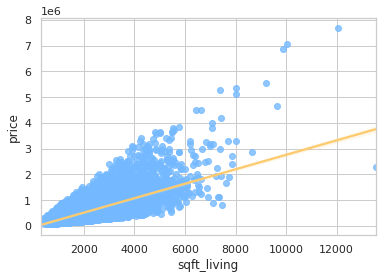

In [85]:
# regplot으로 회귀선 만들기
sns.regplot(x=df['sqft_living'],y=df['price'], scatter_kws={"color": "#74b9ff"}, line_kws={"color": "#fdcb6e"})